In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 

data_dir = '/Users/morton/data/tesser'

In [2]:
df = util.load_struct(data_dir, 100)
df.head()

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,100,1,1,10,object_2.jpg,cor,1.0,c,1.0,1.0,1.426618,1,NaN
1,100,1,2,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.759233,1,NaN
2,100,1,3,4,object_12.jpg,cor,1.0,c,1.0,1.0,0.866177,1,NaN
3,100,1,4,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.712731,1,NaN
4,100,1,5,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.654236,1,NaN


In [3]:
M = sr.explore_runs(df, 'persist',0.5,0.5)

In [4]:
from tesser import plot_models

/Users/morton/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


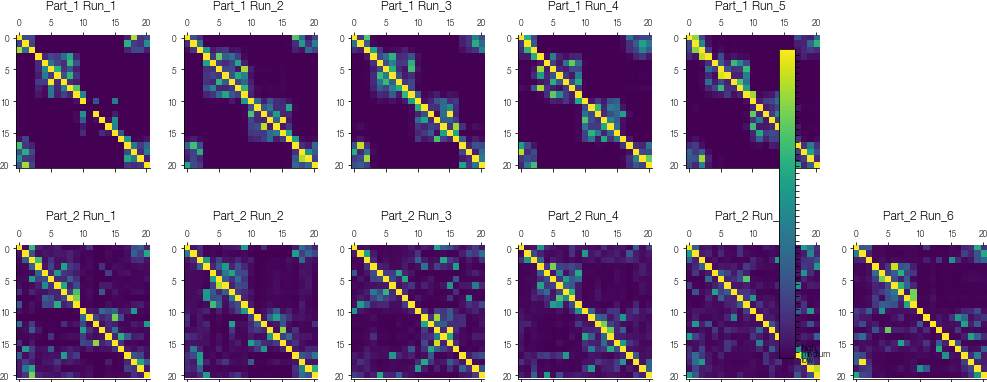

In [5]:
import importlib
importlib.reload(plot_models)
plot_models.plot_explore_runs(M, 100, 'persist',0.5,0.5)

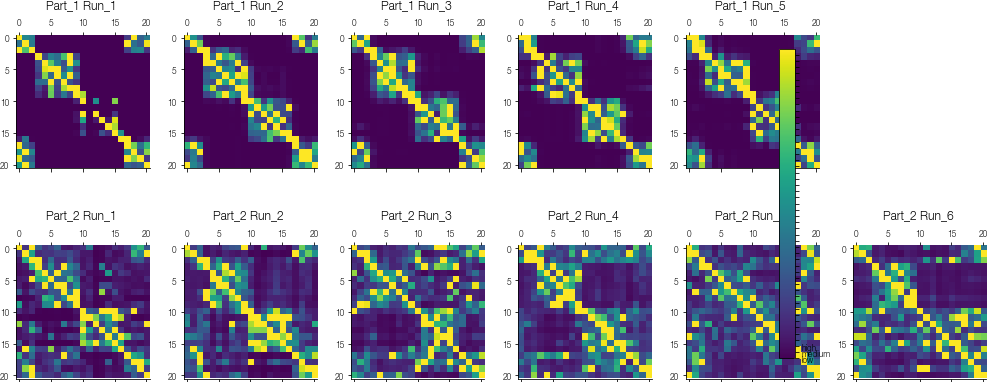

In [6]:
plot_models.plot_explore_runs(sr.explore_runs(df, 'track changes',0.5,0.5), 100, 'persist',0.5,0.5)

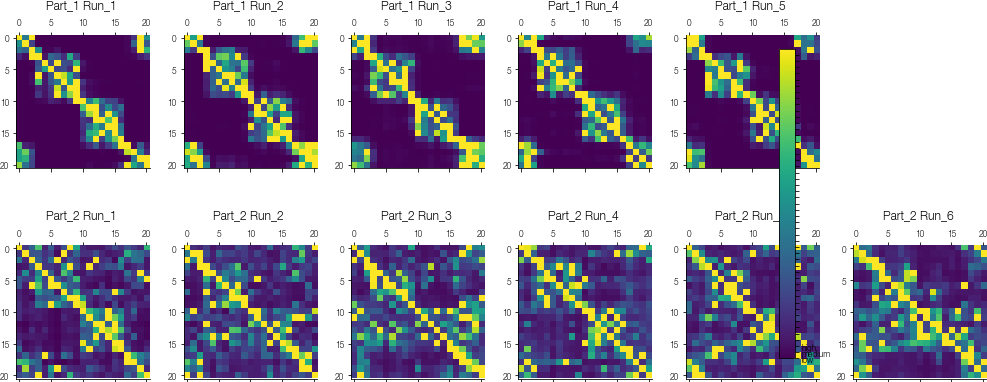

In [7]:
plot_models.plot_explore_runs(sr.explore_runs(util.load_struct(data_dir, 124),'track changes', 0.5,0.5), 124, 'track changes', 0.5, 0.5)

/Users/morton/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


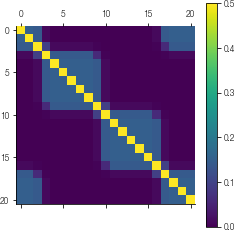

In [8]:
plot_models.plot_adjecncy_matrix()

In [9]:
sr.compute_correlations(df, 'correlation', 0.5, 0.5)

Correlation of L, M: 
0.9517576336522423


In [10]:
I = util.load_induction(data_dir, 100)

In [12]:
logl, p_trial = fit.get_log_likelihood(df, I, 0.5,0.5, True)
print(p_trial)

[0.         0.08264934 0.9102854  0.85167172 0.04544815 0.92774224
 0.06480573 0.90683607 0.27615578 0.06927353 0.14430608 0.03070039
 0.3352742  0.19802891 0.13774343 0.82703202 0.02061208 0.88135426
 0.29830079 0.71587274 0.97609854 0.13437728 0.4227533  0.91796045
 0.04760146 0.855879   0.39747885 0.80451275 0.96246806 0.0151284
 0.51044771 0.13786451 0.01727937 0.35203063 0.55899846 0.93844809
 0.07850807 0.28173529 0.96723547 0.86556603 0.06035815 0.01483236]


In [13]:
importlib.reload(fit)
alpha, gamma = fit.maximize_likelihood(df, I, 'differential evolution')

/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:55: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(trial_probability)
/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:55: RuntimeWarning: invalid value encountered in log
  log_likelihood += np.log(trial_probability)
/Users/morton/anaconda3/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


--- 23.60660195350647 seconds ---


In [14]:
print(f'parameters for subject 100: alpha={alpha:.2f}, gamma={gamma:.2f}')

parameters for subject 100: alpha=0.84, gamma=1.00


<Figure size 432x288 with 0 Axes>

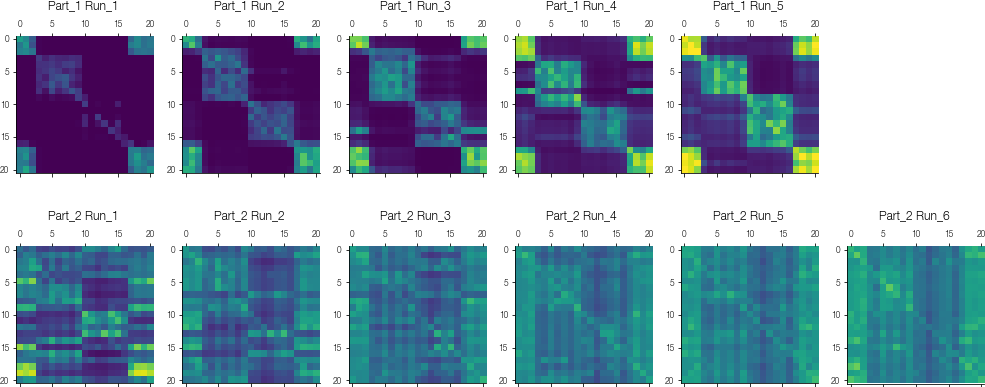

In [24]:
importlib.reload(sr)
importlib.reload(plot_models)
import matplotlib.pyplot as plt
plt.clf()
M = sr.learn_sr(df, gamma, alpha)
plot_models.plot_explore_runs(M, 100, 'persist', gamma, alpha)

In [ ]:
fit.maximize_likelihood(df, I, 'basinhopping', 0.5,0.5)

In [ ]:
fit.maximize_likelihood(df, I, 'brute', 0.5,0.5)

In [ ]:
rdm = rsa.multiple_rdm(M)

In [ ]:
plot_models.plot_rdms(rdm, 100, 0.5, 0.5)